**Name:** Group 9

**Title:** Capstone NLP Project_2 - NMT

**Part A**

• **DOMAIN:**  MACHINE TRANSLATION.

• **CONTEXT:**  Machine Translation is the automated translation of source material into another language without human intervention. The database comes from ACL2014 Ninth workshop on Statistical Machine Translation. This workshop mainly focusses on language translation between European 
language pairs. The idea behind the workshop is to provide the ability for two parties to communicate and exchange the ideas from different 
countries.

• **DATA DESCRIPTION:** The database is basically sentences in German/English of various events. Three datasets are obtained from Statistical Machine Translation workshop. Either the dataset can be downloaded from the link or can be used from the shared files. 

Three datasets are, 
- Europarl v7
- Common Crawl corpus
- News Commentary

Link to download the dataset: https://statmt.org/wmt14/translation-task.html

• **PROJECT OBJECTIVE:**  Design a Machine Translation model that can be used to translate sentences from German language to English language or vice-versa.

**Project Tasks:** [ Total Score: 30 Marks]
1. Milestone 1: [ Score: 40 points ]
- Input: Context and Dataset
- Process:
    - Step 1: Import and merge all the three datasets. [ 5 points ]
    - Step 2: Data cleansing [ 7 points ]
    - Step 3: NLP pre processing - Dataset suitable to be used for AIML model learning [ 8 points ]
    - Step 4: Design, train and test simple RNN & LSTM model [ 10 points ]
    - Step 5: Interim report [ 10 points ]
- Submission: Interim report, Jupyter Notebook with all the steps in Milestone-1

**Milestone 1**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import os

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from keras.models import load_model
from keras.utils.vis_utils import plot_model

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding, Activation, RepeatVector, Dropout, BatchNormalization, Flatten, Bidirectional, TimeDistributed, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

pd.set_option('display.max_colwidth', 200)

import random
random.seed(0)
import re
import string
import warnings
warnings.filterwarnings("ignore")
from numpy import array, argmax, random, take

nltk.download('stopwords',quiet=True) 
nltk.download('wordnet', quiet=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

**Import and merge all the three datasets**

In [4]:
# Opening the source files

europarl_en_dataset = open('/content/drive/My Drive/PGP_AIML/ColabNotebooks/europarl-v7_en_de.txt', encoding='utf-8')
europarl_de_dataset = open('/content/drive/My Drive/PGP_AIML/ColabNotebooks/europarl-v7_de_en.txt', encoding='utf-8')

commoncrawl_en_dataset = open('/content/drive/My Drive/PGP_AIML/ColabNotebooks/commoncrawl_en_de.txt', encoding='utf-8')
commoncrawl_de_dataset = open('/content/drive/My Drive/PGP_AIML/ColabNotebooks/commoncrawl_de_en.txt', encoding='utf-8')

newscommentary_en_dataset = open('/content/drive/My Drive/PGP_AIML/ColabNotebooks/news-commentary-v9_en_de.txt', encoding='utf-8')
newscommentary_de_dataset = open('/content/drive/My Drive/PGP_AIML/ColabNotebooks/news-commentary-v9_de_en.txt', encoding='utf-8')

# Reading the content of the source files

europarl_en = europarl_en_dataset.readlines()
europarl_de = europarl_de_dataset.readlines()

commoncrawl_en = commoncrawl_en_dataset.readlines()
commoncrawl_de = commoncrawl_de_dataset.readlines()

newscommentary_en = newscommentary_en_dataset.readlines()
newscommentary_de = newscommentary_de_dataset.readlines()

# Creating the dataframe of the source files

europarl_en_df = pd.DataFrame(europarl_en, columns=['English'])
europarl_de_df = pd.DataFrame(europarl_de, columns = ['German'])

commoncrawl_en_df = pd.DataFrame(commoncrawl_en, columns=['English'])
commoncrawl_de_df = pd.DataFrame(commoncrawl_de, columns = ['German'])

newscommentary_en_df = pd.DataFrame(newscommentary_en, columns=['English'])
newscommentary_de_df = pd.DataFrame(newscommentary_de, columns = ['German'])

In [5]:
# Observing the head of europarl_en dataframe

europarl_en_df.head(5)

,English
0,Resumption of the session\n
1,"I declare resumed the session of the European Parliament adjourned on Friday 17 December 1999, and I would like once again to wish you a happy new year in the hope that you enjoyed a pleasant fest..."
2,"Although, as you will have seen, the dreaded 'millennium bug' failed to materialise, still the people in a number of countries suffered a series of natural disasters that truly were dreadful.\n"
3,"You have requested a debate on this subject in the course of the next few days, during this part-session.\n"
4,"In the meantime, I should like to observe a minute' s silence, as a number of Members have requested, on behalf of all the victims concerned, particularly those of the terrible storms, in the vari..."


In [6]:
# Observing the head of europarl_de dataframe

europarl_de_df.head(5)

,German
0,Wiederaufnahme der Sitzungsperiode\n
1,"Ich erkläre die am Freitag, dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen, wünsche Ihnen nochmals alles Gute zum Jahreswechsel und hoffe, daß Sie..."
2,"Wie Sie feststellen konnten, ist der gefürchtete ""Millenium-Bug "" nicht eingetreten. Doch sind Bürger einiger unserer Mitgliedstaaten Opfer von schrecklichen Naturkatastrophen geworden.\n"
3,Im Parlament besteht der Wunsch nach einer Aussprache im Verlauf dieser Sitzungsperiode in den nächsten Tagen.\n
4,"Heute möchte ich Sie bitten - das ist auch der Wunsch einiger Kolleginnen und Kollegen -, allen Opfern der Stürme, insbesondere in den verschiedenen Ländern der Europäischen Union, in einer Schwei..."


In [7]:
# Observing the head of commoncrawl_en dataframe

commoncrawl_en_df.head(5)

,English
0,iron cement is a ready for use paste which is laid as a fillet by putty knife or finger in the mould edges (corners) of the steel ingot mould.\n
1,"iron cement protects the ingot against the hot, abrasive steel casting process.\n"
2,"a fire restant repair cement for fire places, ovens, open fireplaces etc.\n"
3,Construction and repair of highways and...\n
4,An announcement must be commercial character.\n


In [8]:
# Observing the head of commoncrawl_de dataframe

commoncrawl_de_df.head(5)

,German
0,"iron cement ist eine gebrauchs-fertige Paste, die mit einem Spachtel oder den Fingern als Hohlkehle in die Formecken (Winkel) der Stahlguss -Kokille aufgetragen wird.\n"
1,"Nach der Aushärtung schützt iron cement die Kokille gegen den heissen, abrasiven Stahlguss .\n"
2,"feuerfester Reparaturkitt für Feuerungsanlagen, Öfen, offene Feuerstellen etc.\n"
3,Der Bau und die Reparatur der Autostraßen...\n
4,die Mitteilungen sollen den geschäftlichen kommerziellen Charakter tragen.\n


In [9]:
# Observing the head of newscommentary_en dataframe

newscommentary_en_df.head(5)

,English
0,"$10,000 Gold?\n"
1,SAN FRANCISCO – It has never been easy to have a rational conversation about the value of gold.\n
2,"Lately, with gold prices up more than 300% over the last decade, it is harder than ever.\n"
3,"Just last December, fellow economists Martin Feldstein and Nouriel Roubini each penned op-eds bravely questioning bullish market sentiment, sensibly pointing out gold’s risks.\n"
4,Wouldn’t you know it?\n


In [10]:
# Observing the head of newscommentary_de dataframe

newscommentary_de_df.head(5)

,German
0,Steigt Gold auf 10.000 Dollar?\n
1,"SAN FRANCISCO – Es war noch nie leicht, ein rationales Gespräch über den Wert von Gold zu führen.\n"
2,"In letzter Zeit allerdings ist dies schwieriger denn je, ist doch der Goldpreis im letzten Jahrzehnt um über 300 Prozent angestiegen.\n"
3,"Erst letzten Dezember verfassten meine Kollegen Martin Feldstein und Nouriel Roubini Kommentare, in denen sie mutig die vorherrschende optimistische Marktstimmung hinterfragten und sehr überlegt a..."
4,"Und es kam, wie es kommen musste.\n"


In [11]:
# Observing the shape of all 6 dataframes

print(europarl_en_df.shape) 
print(europarl_de_df.shape)

print(commoncrawl_en_df.shape)
print(commoncrawl_de_df.shape)

print(newscommentary_en_df.shape)
print(newscommentary_de_df.shape)

(1920209, 1)
(1920209, 1)
(2399123, 1)
(2399123, 1)
(201995, 1)
(201854, 1)


In [12]:
# Checking for the duplicate records in newscommentary dataframes

newscommentary_de_duplicate = newscommentary_de_df[newscommentary_de_df.duplicated()]
newscommentary_en_duplicate = newscommentary_en_df[newscommentary_en_df.duplicated()]

In [13]:
# Checking for the duplicate records in newscommentary_de dataframe

newscommentary_de_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
201849    False
201850    False
201851    False
201852    False
201853    False
Length: 201854, dtype: bool

In [14]:
# Checking for the duplicate records in newscommentary_en dataframe

newscommentary_en_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
201990    False
201991    False
201992    False
201993    False
201994    False
Length: 201995, dtype: bool

In [15]:
# Joining newcommentry dataframes and observing top 5 entries of joined dataframe

newscommentary_df = newscommentary_en_df.join(newscommentary_de_df)

newscommentary_df.head(5)

,English,German
0,"$10,000 Gold?\n",Steigt Gold auf 10.000 Dollar?\n
1,SAN FRANCISCO – It has never been easy to have a rational conversation about the value of gold.\n,"SAN FRANCISCO – Es war noch nie leicht, ein rationales Gespräch über den Wert von Gold zu führen.\n"
2,"Lately, with gold prices up more than 300% over the last decade, it is harder than ever.\n","In letzter Zeit allerdings ist dies schwieriger denn je, ist doch der Goldpreis im letzten Jahrzehnt um über 300 Prozent angestiegen.\n"
3,"Just last December, fellow economists Martin Feldstein and Nouriel Roubini each penned op-eds bravely questioning bullish market sentiment, sensibly pointing out gold’s risks.\n","Erst letzten Dezember verfassten meine Kollegen Martin Feldstein und Nouriel Roubini Kommentare, in denen sie mutig die vorherrschende optimistische Marktstimmung hinterfragten und sehr überlegt a..."
4,Wouldn’t you know it?\n,"Und es kam, wie es kommen musste.\n"


In [16]:
# Observing the information of newscommentry joined dataframe

newscommentary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201995 entries, 0 to 201994
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  201995 non-null  object
 1   German   201854 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [17]:
# Joining commoncrawl dataframes and observing top 5 entries of joined dataframe

commoncrawl_df = commoncrawl_en_df.join(commoncrawl_de_df)

commoncrawl_df.head(5)

,English,German
0,iron cement is a ready for use paste which is laid as a fillet by putty knife or finger in the mould edges (corners) of the steel ingot mould.\n,"iron cement ist eine gebrauchs-fertige Paste, die mit einem Spachtel oder den Fingern als Hohlkehle in die Formecken (Winkel) der Stahlguss -Kokille aufgetragen wird.\n"
1,"iron cement protects the ingot against the hot, abrasive steel casting process.\n","Nach der Aushärtung schützt iron cement die Kokille gegen den heissen, abrasiven Stahlguss .\n"
2,"a fire restant repair cement for fire places, ovens, open fireplaces etc.\n","feuerfester Reparaturkitt für Feuerungsanlagen, Öfen, offene Feuerstellen etc.\n"
3,Construction and repair of highways and...\n,Der Bau und die Reparatur der Autostraßen...\n
4,An announcement must be commercial character.\n,die Mitteilungen sollen den geschäftlichen kommerziellen Charakter tragen.\n


In [18]:
# Observing the information of commoncrawl joined dataframe

commoncrawl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399123 entries, 0 to 2399122
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   English  object
 1   German   object
dtypes: object(2)
memory usage: 36.6+ MB


In [19]:
# Joining europarl dataframes and observing top 5 entries of joined dataframe

europarl_df = europarl_en_df.join(europarl_de_df)

europarl_df.head(5)

,English,German
0,Resumption of the session\n,Wiederaufnahme der Sitzungsperiode\n
1,"I declare resumed the session of the European Parliament adjourned on Friday 17 December 1999, and I would like once again to wish you a happy new year in the hope that you enjoyed a pleasant fest...","Ich erkläre die am Freitag, dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen, wünsche Ihnen nochmals alles Gute zum Jahreswechsel und hoffe, daß Sie..."
2,"Although, as you will have seen, the dreaded 'millennium bug' failed to materialise, still the people in a number of countries suffered a series of natural disasters that truly were dreadful.\n","Wie Sie feststellen konnten, ist der gefürchtete ""Millenium-Bug "" nicht eingetreten. Doch sind Bürger einiger unserer Mitgliedstaaten Opfer von schrecklichen Naturkatastrophen geworden.\n"
3,"You have requested a debate on this subject in the course of the next few days, during this part-session.\n",Im Parlament besteht der Wunsch nach einer Aussprache im Verlauf dieser Sitzungsperiode in den nächsten Tagen.\n
4,"In the meantime, I should like to observe a minute' s silence, as a number of Members have requested, on behalf of all the victims concerned, particularly those of the terrible storms, in the vari...","Heute möchte ich Sie bitten - das ist auch der Wunsch einiger Kolleginnen und Kollegen -, allen Opfern der Stürme, insbesondere in den verschiedenen Ländern der Europäischen Union, in einer Schwei..."


In [20]:
# Observing the information of europarl joined dataframe

europarl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920209 entries, 0 to 1920208
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   English  object
 1   German   object
dtypes: object(2)
memory usage: 29.3+ MB


In [21]:
# Concatenating all 3 joined dataframes

translation_df = pd.concat([newscommentary_df,commoncrawl_df, europarl_df])

translation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521327 entries, 0 to 1920208
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   English  object
 1   German   object
dtypes: object(2)
memory usage: 103.5+ MB


In [22]:
# Observing the shape of merged dataframes

translation_df.shape

(4521327, 2)

In [23]:
# Observing the top 5 entries of merged dataframe

translation_df.head()

,English,German
0,"$10,000 Gold?\n",Steigt Gold auf 10.000 Dollar?\n
1,SAN FRANCISCO – It has never been easy to have a rational conversation about the value of gold.\n,"SAN FRANCISCO – Es war noch nie leicht, ein rationales Gespräch über den Wert von Gold zu führen.\n"
2,"Lately, with gold prices up more than 300% over the last decade, it is harder than ever.\n","In letzter Zeit allerdings ist dies schwieriger denn je, ist doch der Goldpreis im letzten Jahrzehnt um über 300 Prozent angestiegen.\n"
3,"Just last December, fellow economists Martin Feldstein and Nouriel Roubini each penned op-eds bravely questioning bullish market sentiment, sensibly pointing out gold’s risks.\n","Erst letzten Dezember verfassten meine Kollegen Martin Feldstein und Nouriel Roubini Kommentare, in denen sie mutig die vorherrschende optimistische Marktstimmung hinterfragten und sehr überlegt a..."
4,Wouldn’t you know it?\n,"Und es kam, wie es kommen musste.\n"


In [24]:
# Checking the null values in the dataframe

translation_df.isna()

,English,German
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1920204,False,False
1920205,False,False
1920206,False,False
1920207,False,False


In [25]:
# Checking the null values in the dataframe

translation_df.isna().sum()

English      0
German     141
dtype: int64

In [26]:
# Checking the duplicates in the dataframe

translation_df.duplicated().sum()

45016

**Observetion:**

*   Europarl and Commoncrawl datasets have matching entries in both English and German sources.
*   Entries in Newscommentary dataset in English and German sources are not matching.
*   German data sources has 141 null entries
*   Merged dataframe has 45016 duplicate entries.
*   All the sentences are finishing with \n.
*   All duplicate and null values are required be removed as a part of data cleaning activity.











**Model 1: Basic LSTM Model With Full Length Sentences**

**Data Cleansing**

In [27]:
# Dropping the null values from the dataframe

translation_df.dropna()

,English,German
0,"$10,000 Gold?\n",Steigt Gold auf 10.000 Dollar?\n
1,SAN FRANCISCO – It has never been easy to have a rational conversation about the value of gold.\n,"SAN FRANCISCO – Es war noch nie leicht, ein rationales Gespräch über den Wert von Gold zu führen.\n"
2,"Lately, with gold prices up more than 300% over the last decade, it is harder than ever.\n","In letzter Zeit allerdings ist dies schwieriger denn je, ist doch der Goldpreis im letzten Jahrzehnt um über 300 Prozent angestiegen.\n"
3,"Just last December, fellow economists Martin Feldstein and Nouriel Roubini each penned op-eds bravely questioning bullish market sentiment, sensibly pointing out gold’s risks.\n","Erst letzten Dezember verfassten meine Kollegen Martin Feldstein und Nouriel Roubini Kommentare, in denen sie mutig die vorherrschende optimistische Marktstimmung hinterfragten und sehr überlegt a..."
4,Wouldn’t you know it?\n,"Und es kam, wie es kommen musste.\n"
...,...,...
1920204,"I would also like, although they are absent, to mention the Commission and the Council.\n","Ich möchte mir sogar erlauben, die Kommission und den Rat zu nennen, auch wenn sie nicht anwesend sind.\n"
1920205,"I am not going to re-open the 'Millennium or not the Millennium' debate, but I am going to wish all of you, and by extension, all the citizens of Europe which we represent, a happy year 2000.\n","Ich will die Aussprache über ""Millennium ja, Millennium nein "" nicht noch einmal eröffnen, aber ich möchte Ihnen allen und darüber hinaus den von uns vertretenen europäischen Bürgern ein glücklich..."
1920206,Adjournment of the session\n,Unterbrechung der Sitzungsperiode\n
1920207,I declare the session of the European Parliament adjourned.\n,Ich erkläre die Sitzungsperiode des Europäischen Parlaments für unterbrochen.\n


In [28]:
# Dropping the duplicates from the dataframe

translation_df = translation_df.drop_duplicates()

In [29]:
# Observing shape of the dataframe after dropping null values and duplicates 

translation_df.shape

(4476311, 2)

In [30]:
# Randomly sample 5% of dataframe

translation_df_sample = translation_df.sample(frac = 0.005)

In [31]:
# Observing the shape of sampled dataframe

translation_df_sample.shape

(22382, 2)

In [32]:
# Adding columns in the dataframe which shows the length of each English and German sentence

translation_df_sample['eng_length'] = translation_df_sample['English'].str.len()

translation_df_sample['ger_length'] = translation_df_sample['German'].str.len()

In [33]:
# Observing the information of sampled dataframe

translation_df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22382 entries, 664830 to 1242403
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   English     22382 non-null  object
 1   German      22382 non-null  object
 2   eng_length  22382 non-null  int64 
 3   ger_length  22382 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 874.3+ KB


In [34]:
# Observing top 5 entries of the sampled dataframe

translation_df_sample.head(5)

,English,German,eng_length,ger_length
664830,". The trans-European networks are a very important instrument in creating and developing the infrastructure of the transport, telecommunications and energy sectors in Europe.\n",". Die transeuropäischen Verkehrsnetze sind ein äußerst wichtiges Instrument für die Entwicklung und den Aufbau der Infrastrukturen in den Bereichen Verkehr, Telekommunikation und Energie in Eur...",178,201
979036,"Amongst other priorities, the human rights violations in Sri Lanka and Kenya should also be addressed in this session.\n",Unter anderen mit Priorität zu behandelnden Themen sollten auch die Menschenrechtsverletzungen in Sri Lanka und Kenia während dieser Sitzung angesprochen werden.\n,119,162
783707,The gender dimension must be also taken into account in the education of and information for nursing staff.\n,Die Geschlechterdimension muss ebenfalls bei der Ausbildung und Aufklärung des Betreuungspersonals berücksichtigt werden.\n,108,122
847689,"The hotel restaurant is also large enough to hold 300 guests for a refined meal comprised of the best local, national and international cuisine.\n","Das hoteleigene Restaurant bietet ausreichend Platz für bis zu 300 Personen. Hier genießen Sie köstliche Speisen der lokalen, nationalen und internationalen Küche.\n",145,164
1416063,In the class-room you can see PET / CBM computers and there are C64s in the nuclear power plant.\n,Im Klassenzimmer stehen PET / CBM Computer und es gibt C64er im Kernkraftwerk.\n,97,79


In [35]:
# Function to pre_process data

def process_data(df):

    transformed_df = df

    transformed_df['English'] = transformed_df['English'].str.lower()
    transformed_df['German'] = transformed_df['German'].str.lower()

    transformed_df = transformed_df.astype(str).applymap(lambda x: str(x.replace('\n','')))

    transformed_df['German'] = transformed_df['German'].str.strip()
    transformed_df['English'] = transformed_df['English'].str.strip()

    string_punctuation = string.punctuation + "¡" + '¿'
    transformed_df['English'] = transformed_df['English'].map(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    transformed_df['German'] = transformed_df['German'].map(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

    transformed_df = transformed_df.replace('', np.nan)
    transformed_df = transformed_df.dropna()

    transformed_df['English'] = transformed_df['English'].transform(lambda x : 'START_ '+ x + ' _END')
    transformed_df['German'] = transformed_df['German'].transform(lambda x : 'START_ '+ x + ' _END')

    return transformed_df

In [36]:
# Calling process_data function on the sampled dataframe

translation_df_transformed = process_data(translation_df_sample)

In [37]:
# Observing top 5 entries of the processed dataframe

translation_df_transformed.head(5)

,English,German,eng_length,ger_length
664830,START_ the transeuropean networks are a very important instrument in creating and developing the infrastructure of the transport telecommunications and energy sectors in europe _END,START_ die transeuropäischen verkehrsnetze sind ein äußerst wichtiges instrument für die entwicklung und den aufbau der infrastrukturen in den bereichen verkehr telekommunikation und energie in e...,178,201
979036,START_ amongst other priorities the human rights violations in sri lanka and kenya should also be addressed in this session _END,START_ unter anderen mit priorität zu behandelnden themen sollten auch die menschenrechtsverletzungen in sri lanka und kenia während dieser sitzung angesprochen werden _END,119,162
783707,START_ the gender dimension must be also taken into account in the education of and information for nursing staff _END,START_ die geschlechterdimension muss ebenfalls bei der ausbildung und aufklärung des betreuungspersonals berücksichtigt werden _END,108,122
847689,START_ the hotel restaurant is also large enough to hold 300 guests for a refined meal comprised of the best local national and international cuisine _END,START_ das hoteleigene restaurant bietet ausreichend platz für bis zu 300 personen hier genießen sie köstliche speisen der lokalen nationalen und internationalen küche _END,145,164
1416063,START_ in the classroom you can see pet cbm computers and there are c64s in the nuclear power plant _END,START_ im klassenzimmer stehen pet cbm computer und es gibt c64er im kernkraftwerk _END,97,79


**Pre Processing - Dataset suitable to be used for AIML model learning**

In [38]:
# Function to generate word tokens

def tokenize(sentences):
    # Create tokenizer
    text_tokenizer = Tokenizer()

    # Fit texts
    text_tokenizer.fit_on_texts(sentences)
    return text_tokenizer.texts_to_sequences(sentences), text_tokenizer

In [39]:
# Generate word index

eng_tokenized, eng_tokenizer = tokenize(translation_df_transformed['English'])
ger_tokenized, ger_tokenizer = tokenize(translation_df_transformed['German'])

eng_word_index = eng_tokenizer.word_index
ger_word_index = ger_tokenizer.word_index

In [40]:
# Finding the vocabulary size with number of unique tokens

english_vocab = len(eng_tokenizer.word_index) + 1
german_vocab = len(ger_tokenizer.word_index) + 1

print("English vocabulary is of {} unique words".format(english_vocab))
print("german vocabulary is of {} unique words".format(german_vocab))

English vocabulary is of 38664 unique words
german vocabulary is of 63178 unique words


In [41]:
# Define the parameters

maxlen_eng = int(len(max(eng_tokenized, key=len)))
maxlen_ger = int(len(max(ger_tokenized, key=len)))

print("Maximum Length of English tokens is {}".format(maxlen_eng))
print("Maximum Length of German tokens is {}".format(maxlen_ger))

Maximum Length of English tokens is 227
Maximum Length of German tokens is 234


In [42]:
# Generate token sequence

eng_pad_sentence = pad_sequences(eng_tokenized, maxlen_eng, padding = "post")
ger_pad_sentence = pad_sequences(ger_tokenized, maxlen_ger, padding = "post")

print('Number of English Samples are {}:', len(eng_pad_sentence))
print('Number of German Samples are {}:', len(ger_pad_sentence))

Number of English Samples are {}: 22335
Number of German Samples are {}: 22335


**Model Design**

In [43]:
# Creating the tarin and test datasets using train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(eng_pad_sentence,ger_pad_sentence,test_size=0.25,shuffle=True,random_state=101)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16751, 227)
(5584, 227)
(16751, 234)
(5584, 234)


In [44]:
# Designing the basic LSTM model

model_translate_lstm = Sequential()

model_translate_lstm.add(Embedding(input_dim = english_vocab, output_dim = 128, input_length = maxlen_eng, trainable = False))

model_translate_lstm.add(LSTM(64, return_sequences=False))

model_translate_lstm.add(RepeatVector(maxlen_ger))

model_translate_lstm.add(LSTM(64, return_sequences=True, dropout=0.2))

model_translate_lstm.add(TimeDistributed(Dense(1000)))

model_translate_lstm.add(Dense(1000,activation = 'softmax'))

In [45]:
# Compiling the model

model_translate_lstm.compile(loss=sparse_categorical_crossentropy, optimizer=Adam(1e-3), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 227, 128)          4948992   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 repeat_vector (RepeatVector  (None, 234, 64)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 234, 64)           33024     
                                                                 
 time_distributed (TimeDistr  (None, 234, 1000)        65000     
 ibuted)                                                         
                                                                 
 dense_1 (Dense)             (None, 234, 1000)         1

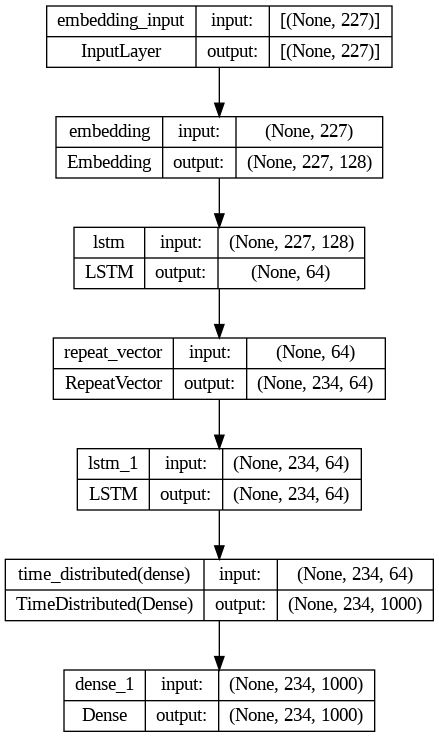

In [46]:
# Observing the model summary

model_translate_lstm.summary()

plot_model(model_translate_lstm, to_file='model.png', show_shapes=True)

In [47]:
# Creating the callbacks

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

es = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=40)
rl = ReduceLROnPlateau(monitor='val_accuracy',mode='max',verbose=1,patience=5,factor=0.1,min_lr=0.001)
mc = ModelCheckpoint('checkpoint/',monitor='val_accuracy',verbose=1,mode='max',save_best_only=True)

In [48]:
# Fitting the model on train and test datasets

history = model_translate_lstm.fit(X_train, Y_train, epochs = 30, batch_size = 128, validation_split = 0.3, callbacks = [es,rl,mc])

Epoch 1/30
92/92 [==============================] - ETA: 0s - loss: nan - accuracy: 0.8910
Epoch 1: val_accuracy improved from -inf to 0.90107, saving model to checkpoint/


92/92 [==============================] - 24s 183ms/step - loss: nan - accuracy: 0.8910 - val_loss: nan - val_accuracy: 0.9011 - lr: 0.0010
Epoch 2/30
91/92 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.9008
Epoch 2: val_accuracy did not improve from 0.90107
92/92 [==============================] - 8s 84ms/step - loss: nan - accuracy: 0.9009 - val_loss: nan - val_accuracy: 0.9011 - lr: 0.0010
Epoch 3/30
91/92 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.9009
Epoch 3: val_accuracy did not improve from 0.90107
92/92 [==============================] - 8s 84ms/step - loss: nan - accuracy: 0.9009 - val_loss: nan - val_accuracy: 0.9011 - lr: 0.0010
Epoch 4/30
91/92 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.9008
Epoch 4: val_accuracy did not improve from 0.90107
92/92 [==============================] - 8s 85ms/step - loss: nan - accuracy: 0.9009 - val_loss: nan - val_accuracy: 0.9011 - lr: 0.0010
Epoch 5/30
91/92 [======

**Performance Evaluation and Prediction:**

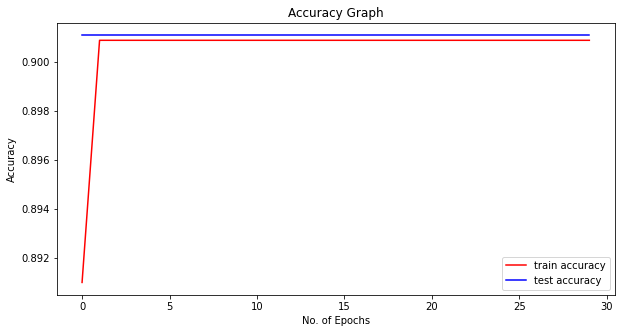

In [49]:
# Plotting accuracy at different epochs

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'],'r',label='train accuracy')
plt.plot(history.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [50]:
# Evaluating the model performance on test data

results_translate = model_translate_lstm.evaluate(X_test, Y_test)

175/175 [==============================] - 3s 15ms/step - loss: nan - accuracy: 0.9001


In [51]:
# Evaluating the model performance on train data

results_translate_train = model_translate_lstm.evaluate(X_train, Y_train)

524/524 [==============================] - 8s 15ms/step - loss: nan - accuracy: 0.9009


In [52]:
# Function to generate words from the index

def logits_to_sentence(logits, tokenizer):

    index_to_words = {idx: word for word, idx in tokenizer.word_index.items()}
    index_to_words[0] = '<empty>' 

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

In [53]:
# Making predictions using model on randomly selected X_test sample 

index = 10

# Printing original sentences from both the languages

print("The english sentence is: {}".format(translation_df_transformed.iloc[index]['English']))
print("The german sentence is: {}".format(translation_df_transformed.iloc[index]['German']))

# Printing predicted sentence

print('The predicted sentence is :')

print(logits_to_sentence(model_translate_lstm.predict(X_test[index:index+1])[0], ger_tokenizer))


The english sentence is: START_ this house has already made a preliminary assessment of what the subsequent costs will be _END
The german sentence is: START_ das parlament hat schon einen entwurf für die folgekostenabschätzung verabschiedet _END
The predicted sentence is :
1/1 [==============================] - 1s 697ms/step
<empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <

**Observation:**



* Basic LSTM model is trained on 5% sample data. Due to the very large size of source data, unable to pre-process the entire dataset.
* Considering the large vocabulary size even with 5% sample data, the output node of the model is restricted to 1000.
* Model is generating similar accuracies on training and test datasets so model is not over fitting.
* Model accuracy is not improving after 2nd epoch and loss is ‘nan’ on both train and test datasets.
* Model is not predicting well and only generating a sequence of <empty> tokens as predicted sentences.
* So, we tried to observe model performance with shorter length of sentence with both LSTM and RNN methods.

**Model 2: Basic RNN Model With Short Length Sentences**

In [54]:
# Randomly sample 5% of dataframe

translation_df_reduced = translation_df.sample(frac = 0.005)

**Data Cleaning**



In [55]:
# Processing the data and get sentences lengthn upto 6 words.

translation_df_reduced = translation_df_reduced[translation_df_reduced.English.str.count('\s+').lt(6)]

translation_df_reduced = translation_df_reduced.astype(str).applymap(lambda x: str(x.replace('\n','')))

translation_df_reduced['German'] = translation_df_reduced['German'].str.strip()

translation_df_reduced['English'] = translation_df_reduced['English'].str.strip()

translation_df_reduced = translation_df_reduced.replace('', np.nan)

translation_df_reduced = translation_df_reduced.dropna()

In [56]:
translation_df_reduced.count('index')

English    249
German     249
dtype: int64

In [57]:
translation_df_reduced.head(10)

,English,German
1427254,This is plainly a smokescreen.,Dies ist einfach nur ein Vorwand.
988289,We need to address that.,Darum müssen wir uns kümmern.
1764967,Let us have action!,Laßt uns handeln!
1918697,Helsinki European Council,Europäischer Rat von Helsinki
637527,It is worth it.,Sie ist es wert.
1088431,Do not reject it.,Sie sollten sie nicht zurückweisen.
563064,Point 5 (k).,Ziffer 5 Buchstabe k).
839789,Diana Wallis,Diana Wallis
661557,I feel this is unjustified.,Ich halte das für nicht gerechtfertigt.
609249,We need that park.,Wir brauchen diesen Park.


In [58]:
# Saving the dataframe into text file

np.savetxt('/content/drive/My Drive/PGP_AIML/ColabNotebooks/combined_eng_ger.txt', translation_df_reduced.to_numpy(), delimiter='\t', fmt='%s')

**Pre Processing - Dataset suitable to be used for AIML model learning**

In [59]:
# Function to load the data from text file

def load_doc(filename):

    # open the file as read only
    file = open(filename, mode='rt', encoding='utf-8')

    # read all text
    text = file.read()

    # close the file
    file.close()
    
    return text

In [60]:
# Function to form pairs of the sentences from loaded file 

def to_pairs(doc):
    lines = doc.strip().split('\n')
    pairs = [line.split('\t') for line in  lines]
    return pairs

In [61]:
from unicodedata import normalize

# Function to clean a list of lines

def clean_pairs(lines):
    cleaned = list()
    
    # prepare regex for char filtering
    re_print = re.compile('[^%s]' % re.escape(string.printable))
    
    # prepare translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    
    for pair in lines:
        clean_pair = list()
        for line in pair:
            # normalize unicode characters
            line = normalize('NFD', line).encode('ascii', 'ignore')
            line = line.decode('UTF-8')
            
            # tokenize on white space
            line = line.split()
            
            # convert to lowercase
            line = [word.lower() for word in line]
            
            # remove punctuation from each token
            line = [word.translate(table) for word in line]
            
            # remove non-printable chars form each token
            line = [re_print.sub('', w) for w in line]
            
            # remove tokens with numbers in them
            line = [word for word in line if word.isalpha()]
            
            # store as string
            clean_pair.append(' '.join(line))
        cleaned.append(clean_pair)
    return array(cleaned)

In [62]:
# Function to save clean data

from pickle import load,dump
def save_clean_data(sentences, filename):
    dump(sentences, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [63]:
# Loading dataset
filename = '/content/drive/My Drive/PGP_AIML/ColabNotebooks/combined_eng_ger.txt'

doc = load_doc(filename)

# Calling to_pair function to split dat into english-german pairs
pairs = to_pairs(doc)

# Calling clean_pair function to clean the sentences
clean_pairs = clean_pairs(pairs)

# Calling save_clean_data function to save clean pairs into file
save_clean_data(clean_pairs, '/content/drive/My Drive/PGP_AIML/ColabNotebooks/german-english.pkl')

Saved: /content/drive/My Drive/PGP_AIML/ColabNotebooks/german-english.pkl


In [64]:
# Function to load the clean dataset

def load_clean_sentences(filename):
    return load(open(filename, 'rb'))

In [65]:
# Observing the size of clean pairs

print(clean_pairs.size)

498


In [66]:
from numpy.random import shuffle

# Loading clean dataset
raw_dataset = load_clean_sentences('/content/drive/My Drive/PGP_AIML/ColabNotebooks/german-english.pkl')

# Reducing dataset size
n_sentences = clean_pairs.size
dataset = raw_dataset[:n_sentences, :]

# Randomly shuffling the dataset
shuffle(dataset)

# Generating train and test datasets
train, test = train_test_split(dataset, test_size=0.25, random_state=1) 

# Saving clean, train, test dataset into pickle file
save_clean_data(dataset, '/content/drive/My Drive/PGP_AIML/ColabNotebooks/english-german-both.pkl')
save_clean_data(train, '/content/drive/My Drive/PGP_AIML/ColabNotebooks/english-german-train.pkl')
save_clean_data(test, '/content/drive/My Drive/PGP_AIML/ColabNotebooks/english-german-test.pkl')

Saved: /content/drive/My Drive/PGP_AIML/ColabNotebooks/english-german-both.pkl
Saved: /content/drive/My Drive/PGP_AIML/ColabNotebooks/english-german-train.pkl
Saved: /content/drive/My Drive/PGP_AIML/ColabNotebooks/english-german-test.pkl


In [67]:
# Function to generate tokens

def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [68]:
# Function to get maximum length of the sentences

def max_length(lines):
    return max(len(line.split()) for line in lines)

In [69]:
# Function to generate sequence of tokens and do the padding

def encode_sequences(tokenizer, length, lines):
    X = tokenizer.texts_to_sequences(lines)

    # padding sequences with 0 values
    X = pad_sequences(X, maxlen=length, padding='post')
    
    return X

In [70]:
from keras.utils import to_categorical

# Function to convert vectors into binary matrix
 
def encode_output(sequences, vocab_size):
    ylist = list()
    for sequence in sequences:
        encoded = to_categorical(sequence, num_classes=vocab_size)
        ylist.append(encoded)
    y = array(ylist)
    y = y.reshape(sequences.shape[0], sequences.shape[1], vocab_size)
    return y

In [71]:
from keras.utils.vis_utils import plot_model

In [72]:
# Loading clean, train, and test datasets

dataset = load_clean_sentences('/content/drive/My Drive/PGP_AIML/ColabNotebooks/english-german-both.pkl')
train = load_clean_sentences('/content/drive/My Drive/PGP_AIML/ColabNotebooks/english-german-train.pkl')
test = load_clean_sentences('/content/drive/My Drive/PGP_AIML/ColabNotebooks/english-german-test.pkl')

In [73]:
# Preparing English tokenizer

eng_tokenizer_rnn = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer_rnn.word_index) + 1
eng_length_rnn = max_length(dataset[:, 0])
print('English Vocabulary Size: %d' % eng_vocab_size)
print('English Max Length: %d' % (eng_length_rnn))

# Preparing German tokenizer

ger_tokenizer_rnn = create_tokenizer(dataset[:, 1])
ger_vocab_size = len(ger_tokenizer_rnn.word_index) + 1
ger_length_rnn = max_length(dataset[:, 1])
print('German Vocabulary Size: %d' % ger_vocab_size)
print('German Max Length: %d' % (ger_length_rnn))

English Vocabulary Size: 510
English Max Length: 5
German Vocabulary Size: 898
German Max Length: 45


In [74]:
# prepare training data
trainX = encode_sequences(ger_tokenizer_rnn, ger_length_rnn, train[:, 1])
trainY = encode_sequences(eng_tokenizer_rnn, eng_length_rnn, train[:, 0])
trainY = encode_output(trainY, eng_vocab_size)

# prepare validation data
testX = encode_sequences(ger_tokenizer_rnn, ger_length_rnn, test[:, 1])
testY = encode_sequences(eng_tokenizer_rnn, eng_length_rnn, test[:, 0])
testY = encode_output(testY, eng_vocab_size)

**Model Design**

In [75]:
# Function to define RNN model

def define_simple_model(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True))
    model.add(SimpleRNN(n_units))
    model.add(RepeatVector(tar_timesteps))
    model.add(SimpleRNN(n_units, return_sequences=True))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

In [76]:
# Calling LSTM model function

model_translate_RNN = define_simple_model(ger_vocab_size, eng_vocab_size, ger_length_rnn, eng_length_rnn, 256)

In [77]:
# Compiling the model

model_translate_RNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 45, 256)           229888    
                                                                 
 simple_rnn (SimpleRNN)      (None, 256)               131328    
                                                                 
 repeat_vector_1 (RepeatVect  (None, 5, 256)           0         
 or)                                                             
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5, 256)            131328    
                                                                 
 time_distributed_1 (TimeDis  (None, 5, 510)           131070    
 tributed)                                                       
                                                                 
Total params: 623,614
Trainable params: 623,614
Non-tr

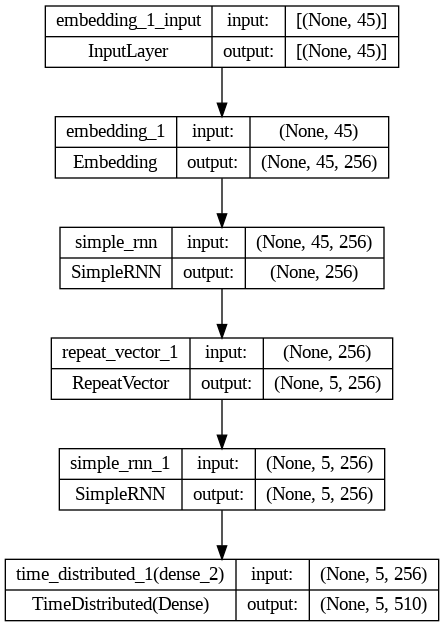

In [78]:
# Printing model summary and plotting the model

print(model_translate_RNN.summary())

plot_model(model_translate_RNN, to_file='model.png', show_shapes=True)

In [79]:
# Fitting model on train and test datasets

filename = 'model.h5'

history_1 = model_translate_RNN.fit(trainX, trainY, epochs=30, batch_size=64, validation_split = 0.3, callbacks=[es,rl,mc])

Epoch 1/30
3/3 [==============================] - ETA: 0s - loss: 6.2268 - accuracy: 0.0200
Epoch 1: val_accuracy did not improve from 0.90107
3/3 [==============================] - 2s 244ms/step - loss: 6.2268 - accuracy: 0.0200 - val_loss: 6.1753 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 2/30
3/3 [==============================] - ETA: 0s - loss: 5.8547 - accuracy: 0.2631
Epoch 2: val_accuracy did not improve from 0.90107
3/3 [==============================] - 0s 75ms/step - loss: 5.8547 - accuracy: 0.2631 - val_loss: 5.8882 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 3/30
3/3 [==============================] - ETA: 0s - loss: 5.3029 - accuracy: 0.2308
Epoch 3: val_accuracy did not improve from 0.90107
3/3 [==============================] - 0s 75ms/step - loss: 5.3029 - accuracy: 0.2308 - val_loss: 5.6169 - val_accuracy: 0.2071 - lr: 0.0010
Epoch 4/30
3/3 [==============================] - ETA: 0s - loss: 4.8948 - accuracy: 0.2338
Epoch 4: val_accuracy did not improve from 0.90107
3/3 

**Performance Evaluation and Prediction:**

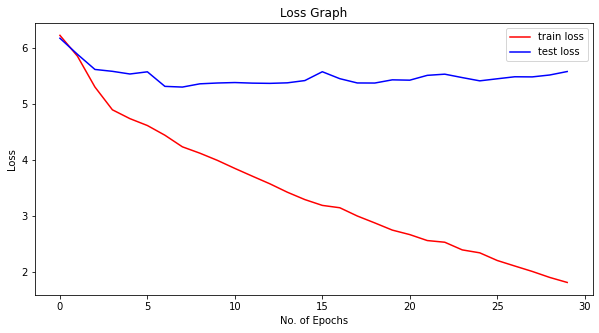

In [80]:
# Plotting loss at different epochs

plt.figure(figsize=(10,5))
plt.plot(history_1.history['loss'],'r',label='train loss')
plt.plot(history_1.history['val_loss'],'b',label='test loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

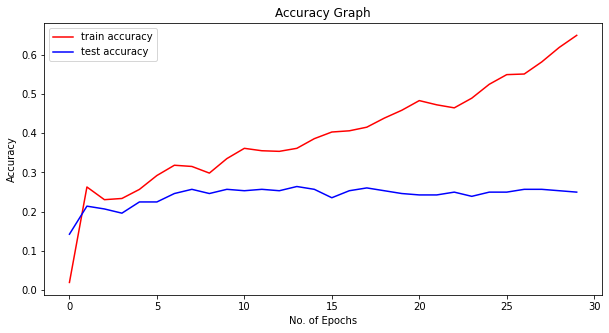

In [81]:
# Plotting accuracy at different epochs

plt.figure(figsize=(10,5))
plt.plot(history_1.history['accuracy'],'r',label='train accuracy')
plt.plot(history_1.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [82]:
# Evaluating the model performance

results_translate_rnn_test = model_translate_RNN.evaluate(testX, testY)

2/2 [==============================] - 0s 10ms/step - loss: 5.7033 - accuracy: 0.2381


In [83]:
# Evaluating the model performance on train data

results_translate_rnn_train = model_translate_RNN.evaluate(trainX, trainY)

6/6 [==============================] - 0s 8ms/step - loss: 2.8821 - accuracy: 0.5484


In [84]:
# Function to convert index to word

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [85]:
# Function to make predictions

def predict_sequence(model, tokenizer, source):
    prediction = model.predict(source, verbose=0)[0]
    integers = [argmax(vector) for vector in prediction]
    target = list()
    for i in integers:
        word = word_for_id(i, tokenizer)
        if word is None:
            break
        target.append(word)
    return ' '.join(target)

**BLEU Score:**

*   BLEU (BiLingual Evaluation Understudy) is a metric for automatically evaluating machine-translated text. The BLEU score is a number between zero and one that measures the similarity of the machine-translated text to a set of high quality reference translations. 
*   The BLEU score compares a sentence against one or more reference sentences and tells how well does the candidate sentence matched the list of reference sentences. It gives an output score between 0 and 1. A BLEU score of 1 means that the candidate sentence perfectly matches one of the reference sentences.

In [86]:
from nltk.translate.bleu_score import corpus_bleu

# Function to evaluate model performance using BLEU score
def evaluate_model(model, tokenizer, sources, raw_dataset):
    actual, predicted = list(), list()
    for i, source in enumerate(sources):

        # Translating encoded source text
        source = source.reshape((1, source.shape[0]))
        translation = predict_sequence(model, eng_tokenizer_rnn, source)
        raw_target, raw_src = raw_dataset[i]
        if i < 10:
            print("The German sentence is:", raw_src)
            print("The English sentence is:", raw_target)
            print("The predicted sentence is:", translation)
            print("*"*50)
        actual.append([raw_target.split()])
        predicted.append(translation.split())
    
    # Calculating BLEU score
    print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
    print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

In [87]:
# Evaluating model on train dataset

print('Prediction of training sentences:')
evaluate_model(model_translate_RNN, eng_tokenizer_rnn, trainX, train)


Prediction of training sentences:
The German sentence is: diana wallis
The English sentence is: diana wallis
The predicted sentence is: 
**************************************************
The German sentence is: aller voraussicht nach werden auch die ubrigen vier mitgliedstaaten in den nachsten jahren in die wahrungsunion eintreten
The English sentence is: that is a complete certainty
The predicted sentence is: that is complete complete certainty
**************************************************
The German sentence is: durch den versuch die uno zu einem instrument des kampfes gegen amerika zu machen wird sie nur noch weiter geschwacht oder vollig marginalisiert
The English sentence is: reforming russias military industrial complex
The predicted sentence is: reforming russias military industrial complex
**************************************************
The German sentence is: sobald diese graueltaten entdeckt wurden hat die regierung schnell gehandelt
The English sentence is: but no m

In [88]:
# Evaluating model on test dataset

print('Prediction of test sentences:')
evaluate_model(model_translate_RNN, eng_tokenizer_rnn, testX, test)

Prediction of test sentences:
The German sentence is: das parlament wird sicherlich mithelfen
The English sentence is: parliament will certainly provide assistance
The predicted sentence is: that is that good good
**************************************************
The German sentence is: die turkei leugnet den armenischen holocaust
The English sentence is: turkey denies its armenian holocaust
The predicted sentence is: so is
**************************************************
The German sentence is: unser standpunkt ist vollkommen klar
The English sentence is: our position is absolutely clear
The predicted sentence is: we is is
**************************************************
The German sentence is: wie das funktionieren soll
The English sentence is: how
The predicted sentence is: they
**************************************************
The German sentence is: ruckwurfe von fischen
The English sentence is: fish discards
The predicted sentence is: welcome is
****************************

**Model3: LSTM with Short Length Sentences**



Data cleaning and Pre processing is used as it is from Model 2. 

**Model Design**

In [89]:
# Function to define LSTM model

def define_model(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True))
    model.add(LSTM(n_units))
    model.add(RepeatVector(tar_timesteps))
    model.add(LSTM(n_units, return_sequences=True))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

In [90]:
# Calling LSTM model function

model_translate_LSTM = define_model(ger_vocab_size, eng_vocab_size, ger_length_rnn, eng_length_rnn, 256)

In [91]:
# Compiling the model

model_translate_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 45, 256)           229888    
                                                                 
 lstm_2 (LSTM)               (None, 256)               525312    
                                                                 
 repeat_vector_2 (RepeatVect  (None, 5, 256)           0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 5, 256)            525312    
                                                                 
 time_distributed_2 (TimeDis  (None, 5, 510)           131070    
 tributed)                                                       
                                                                 
Total params: 1,411,582
Trainable params: 1,411,582
No

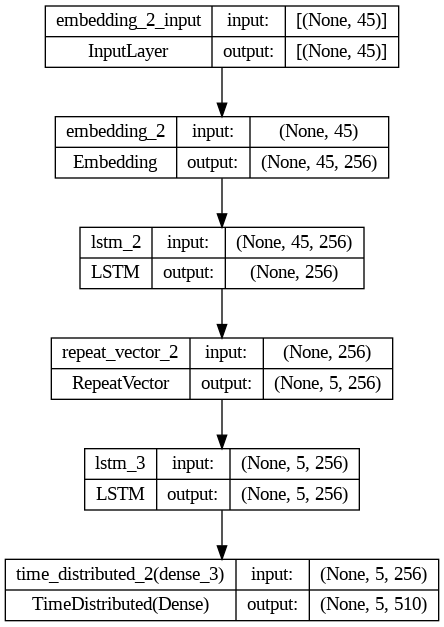

In [92]:
# Printing model summary and plotting the model

print(model_translate_LSTM.summary())

plot_model(model_translate_LSTM, to_file='model.png', show_shapes=True)

In [93]:
# Fitting model on train and test datasets

filename = 'model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_accuracy', verbose=1, save_best_only=True, mode='min')

history_2 = model_translate_LSTM.fit(trainX, trainY, epochs=30, batch_size=64, validation_split = 0.3, callbacks=[es,rl,mc])

Epoch 1/30
2/3 [===================>..........] - ETA: 0s - loss: 6.2324 - accuracy: 0.1250
Epoch 1: val_accuracy did not improve from 0.90107
3/3 [==============================] - 7s 1s/step - loss: 6.2324 - accuracy: 0.1231 - val_loss: 6.2243 - val_accuracy: 0.2179 - lr: 0.0010
Epoch 2/30
1/3 [=========>....................] - ETA: 0s - loss: 6.2205 - accuracy: 0.2062
Epoch 2: val_accuracy did not improve from 0.90107
3/3 [==============================] - 0s 26ms/step - loss: 6.2159 - accuracy: 0.2200 - val_loss: 6.2045 - val_accuracy: 0.2179 - lr: 0.0010
Epoch 3/30
2/3 [===================>..........] - ETA: 0s - loss: 6.1817 - accuracy: 0.2219
Epoch 3: val_accuracy did not improve from 0.90107
3/3 [==============================] - 0s 75ms/step - loss: 6.1818 - accuracy: 0.2200 - val_loss: 6.1276 - val_accuracy: 0.2179 - lr: 0.0010
Epoch 4/30
2/3 [===================>..........] - ETA: 0s - loss: 6.0511 - accuracy: 0.2219
Epoch 4: val_accuracy did not improve from 0.90107
3/3 [==

**Performance Evaluation and Prediction:**

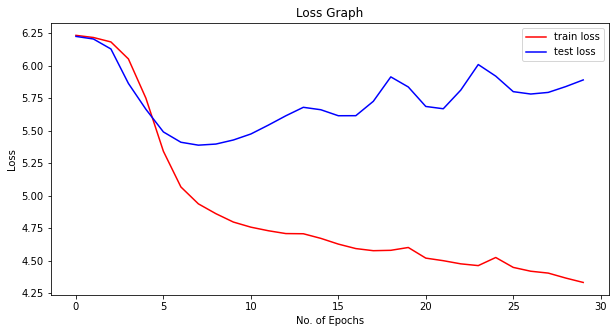

In [94]:
# Plotting loss at different epochs

plt.figure(figsize=(10,5))
plt.plot(history_2.history['loss'],'r',label='train loss')
plt.plot(history_2.history['val_loss'],'b',label='test loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

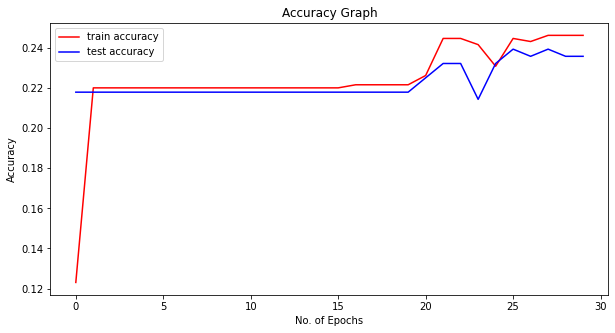

In [95]:
# Plotting accuracy at different epochs

plt.figure(figsize=(10,5))
plt.plot(history_2.history['accuracy'],'r',label='train accuracy')
plt.plot(history_2.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [96]:
# Evaluating the model performance on test data

results_translate_lstm_test = model_translate_LSTM.evaluate(testX, testY)

2/2 [==============================] - 0s 7ms/step - loss: 5.9571 - accuracy: 0.2571


In [97]:
# Evaluating the model performance on train data

results_translate_lstm_train = model_translate_LSTM.evaluate(trainX, trainY)

6/6 [==============================] - 0s 8ms/step - loss: 4.7856 - accuracy: 0.2441


In [98]:
# Evaluating model on train dataset

print('Prediction of training sentences:')
evaluate_model(model_translate_LSTM, eng_tokenizer_rnn, trainX, train)


Prediction of training sentences:
The German sentence is: diana wallis
The English sentence is: diana wallis
The predicted sentence is: is
**************************************************
The German sentence is: aller voraussicht nach werden auch die ubrigen vier mitgliedstaaten in den nachsten jahren in die wahrungsunion eintreten
The English sentence is: that is a complete certainty
The predicted sentence is: is is is
**************************************************
The German sentence is: durch den versuch die uno zu einem instrument des kampfes gegen amerika zu machen wird sie nur noch weiter geschwacht oder vollig marginalisiert
The English sentence is: reforming russias military industrial complex
The predicted sentence is: is is is
**************************************************
The German sentence is: sobald diese graueltaten entdeckt wurden hat die regierung schnell gehandelt
The English sentence is: but no more
The predicted sentence is: is is
*************************

In [99]:
# Evaluating model on test dataset

print('Prediction of test sentences:')
evaluate_model(model_translate_LSTM, eng_tokenizer_rnn, testX, test)

Prediction of test sentences:
The German sentence is: das parlament wird sicherlich mithelfen
The English sentence is: parliament will certainly provide assistance
The predicted sentence is: is is
**************************************************
The German sentence is: die turkei leugnet den armenischen holocaust
The English sentence is: turkey denies its armenian holocaust
The predicted sentence is: is is
**************************************************
The German sentence is: unser standpunkt ist vollkommen klar
The English sentence is: our position is absolutely clear
The predicted sentence is: is is
**************************************************
The German sentence is: wie das funktionieren soll
The English sentence is: how
The predicted sentence is: is is
**************************************************
The German sentence is: ruckwurfe von fischen
The English sentence is: fish discards
The predicted sentence is: is
**************************************************
The 

**Observation:**

* Model 1 is predicting the German sentences from English sentences.
* Model is generating similar accuracies on training and test datasets so model is not over fitting.
* Model 1 accuracy is not improving after 2nd epoch and loss is ‘nan’ on both train and test datasets.
* Model 1 has high test accuracy 92.87% and train accuracy of 92.91%, however it is predicting only empty string.
* Model 2 and 3 are predicting English sentences from German sentences.
* Model 2 has test accuracy of 23.81% and train accuracy of 54.84%. It is predicting training sentences with more accurate words. However, it looks overfitted model.
* BLEU score of Model 2 on test data is 0.081 and on train data is 0.45.
* Model 2 accuracy on test dataset is staying in same range after 7th epoch, however it is contentiously increasing on train dataset.
* Model 2 loss is sharply decreasing on train dataset, however it is slightly increasing after 7th epoch on test dataset.
* Model 2 is predicting some words on test data, but it does not look like a generalized and stable model.
* Model 3 is not overfitting. Training data accuracy and test data accuracy is almost similar (25%), however it is predicting shorter sentences only with the specific words.
* Model accuracy on both test and train dataset is staying stable till 20th epoch then starts increasing.
* Model loss on train dataset is declining sharply, however loss on test dataset is decreasing up to 5th epoch then starts increasing.
* BLEU score of Model 3 on train data is 0.048 and on test data is 0.056. 
* Considering the performance of all the 3 basic models implemented, both LSTM models are not over fitting but they are not predicting well.Model 2 (RNN with shorter lenght of sentences) is predicting few words correctly in test data but it is not looking generalised model.
* We will need to consider other approaches to get better performance and outcome.



**Improvement:**

*   Based on the performances of the basic models, we shall look for advance models like Encoder_Decoder approach, Bi-directional LSTM, and LSTM model with attention layer to expect improved performace.

